In [2]:
import os, pathlib, shutil, random, urllib, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Train Size = 3601
Test Size = 1320
Length = 500
N_of_classes = 2
Number of Dimensions = 1

In [14]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

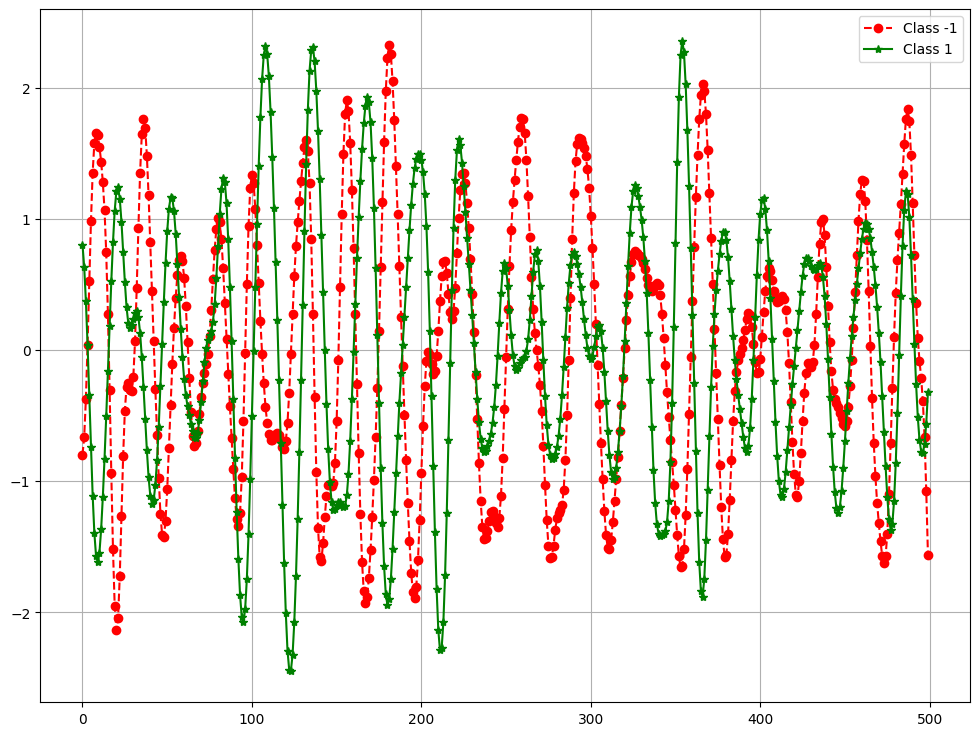

In [4]:
# Plot a couple of signals
# Each row is a time series beign measured

fig,ax = plt.subplots(figsize = (12,9))
ax.plot(np.arange(0,x_train.shape[1]), x_train[0,:], label = 'Class -1', c ='r', marker = 'o', ls = '--')
ax.plot(np.arange(0,x_train.shape[1]), x_train[1,:], label = 'Class 1', c= 'g', marker = '*', ls='-')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

In [16]:
print(y_train[0], y_train[1])
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Reshape to adecuate format for your classifier

#x_train = x_train.reshape((x_train.shape[1], x_train.shape[0])) # Index in x (rows), variable in y (columns)
#x_test = x_test.reshape((x_test.shape[1], x_test.shape[0])) # Index in x (rows), variable in y (columns)

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0
print(y_train[0], y_train[1])

0 1
(3601, 500) (3601,)
(1320, 500) (1320,)
0 1


In [24]:
'''
 # Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')
xgb_clf.fit(x_train, y_train)
y_pred_xgb = xgb_clf.predict(x_test)
print('XGBoost accuracy:', accuracy_score(y_test, y_pred_xgb))


XGBoost accuracy: 0.7848484848484848


In [26]:

# Histogram Gradient Boosting Classifier
hgb_clf = HistGradientBoostingClassifier(random_state=42,validation_fraction=0.2)
hgb_clf.fit(x_train, y_train)
y_pred_hgb = hgb_clf.predict(x_test)
print('HistGradientBoostingClassifier accuracy:', accuracy_score(y_test, y_pred_hgb))


HistGradientBoostingClassifier accuracy: 0.7848484848484848


https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#time-steps-as-categories
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#time-based-cross-validation
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#trigonometric-features